<a href="https://colab.research.google.com/github/kuonumber/cv_50_days/blob/master/Day004_geometric_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import time

In [ ]:
# https://stackoverflow.com/questions/57090598/using-cv2-imshow-in-google-colab

In [ ]:
! wget https://cvdl-fileentity.cupoy.com/marathon/homework/data/1586167928665/lena.png?t=1586167940239

In [ ]:
!ls

In [ ]:
img_path = 'lena.png?t=1586167940239'
# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# 以灰階圖片的方式載入
# img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 以灰階圖片的方式載入
img = cv2.imread(img_path, 1)

## color space

In [ ]:



# 改變不同的 color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)


# 為了要不斷顯示圖片，所以使用一個迴圈
# 顯示彩圖
cv2_imshow(img)
# 顯示灰圖
cv2_imshow(img_gray)
# 顯示hsv圖
cv2_imshow(img_hsv)

cv2_imshow(img_hls)

cv2_imshow(img_lab)


In [ ]:

b = img.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = img.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = img.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

In [ ]:
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)


In [ ]:
# 為了要改變飽和度，我們先把 color space 轉成 HSL 格式 (OpenCV 表示順序是 HLS)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HLS color space 減少飽和度
img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - change_percentage
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')

# 在 HLS color space 增加飽和度
img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1]/255 + change_percentage
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1]*255
img_hls_up = img_hls_up.astype('uint8')

# 轉換
img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2BGR)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2BGR)

# 組合圖片 + 顯示圖片
img_hls_change = np.hstack((img, img_hls_down, img_hls_up))

In [ ]:
cv2_imshow(img_hls_change)


In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 灰階圖片直方圖均衡
img_gray_equal = cv2.equalizeHist(img_gray)

# 組合圖片 + 顯示圖片
img_gray_equalHist = np.hstack((img_gray, img_gray_equal))

In [ ]:
cv2_imshow(img_gray_equalHist)


In [ ]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))

In [ ]:
cv2_imshow(img_contrast_light)


## 改變飽和度

In [ ]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2


In [ ]:
img.shape

In [ ]:
img_hsv[...,1]

In [ ]:
img_hsv[::,1].shape

In [ ]:
img_hsv[:,:,1].shape

In [ ]:

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')

img_hsv_down = img_hsv[:,:,1]/255 - change_percentage
# img_hsv_down = img_hsv[...,1]/255 - change_percentage


In [ ]:
img_hsv_down[img_hsv_down<0] = 0

In [ ]:
img_hsv_down = np.int8(img_hsv_down * 255)
# img_hsv_down = img_hsv_down.astype('uint8')

In [ ]:
cv2_imshow(img_hsv_down)

In [ ]:

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv[:,:,1]/255 + change_percentage
img_hsv_up[img_hsv_up>1] = 1
img_hsv_up = np.int16(img_hsv_up * 255)
cv2_imshow(img_hsv_up)

In [ ]:
img_hsv[:,:,1] = img_hsv_down

In [ ]:
img_hsv_down_ = img_hsv


In [ ]:
img_hsv[:,:,1] = img_hsv_up

In [ ]:
img_hsv_up_ = img_hsv

In [ ]:


# 轉換 color space 回 BGR
img_hsv_down_ = cv2.cvtColor(img_hsv_down_, cv2.COLOR_HSV2BGR)
img_hsv_up_ = cv2.cvtColor(img_hsv_up_, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down_, img_hsv_up_))

In [ ]:
cv2_imshow(img_hsv_change)


## 實作直方均衡

In [ ]:
# 轉為灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 灰階圖片直方圖均衡
img_gray_equal = cv2.equalizeHist(img_gray)

# 組合圖片 + 顯示圖片
img_gray_equalHist = np.hstack((img_gray, img_gray_equal))

In [ ]:
img.shape

In [ ]:
# case 1
# 每個 channel 個別做直方圖均衡
img_bgr_equal = [cv2.equalizeHist(img[:,:,i]) for i in [0,1,2]]


In [ ]:
img_bgr_equal_ = cv2.merge(img_bgr_equal)
#https://stackoverflow.com/questions/34712144/merge-hsv-channels-under-opencv-3-in-python

In [ ]:
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


In [ ]:
img_hsv_equal[:,:,0] = cv2.equalizeHist(img_hsv_equal[:,:,0])

In [ ]:
img_hsv_equal.shape

In [ ]:

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal_, img_hsv_equal))


In [ ]:
cv2_imshow(img_bgr_equalHist)


## 明亮對比

In [ ]:

# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))


In [ ]:
cv2_imshow(img_contrast_light)


In [ ]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=3.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50 )

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))

In [ ]:
cv2_imshow(img_contrast_light)


## geometric_transform


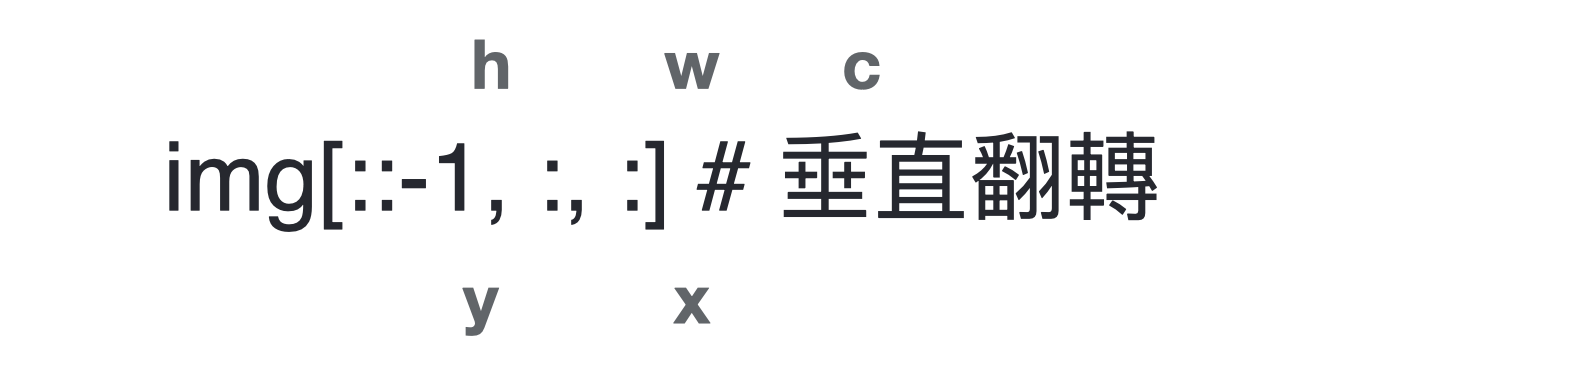

In [ ]:
img_vflip = img[::-1, :, :]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_vflip))
vflip = np.vstack((img, img_vflip))

In [ ]:
cv2_imshow(img_vflip)


In [ ]:
img_hflip = img[:, ::-1, :]
# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]
# 水平 + 垂直翻轉
img_hvflip = img[::-1, ::-1, :]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))

In [ ]:
cv2_imshow(img_flip)


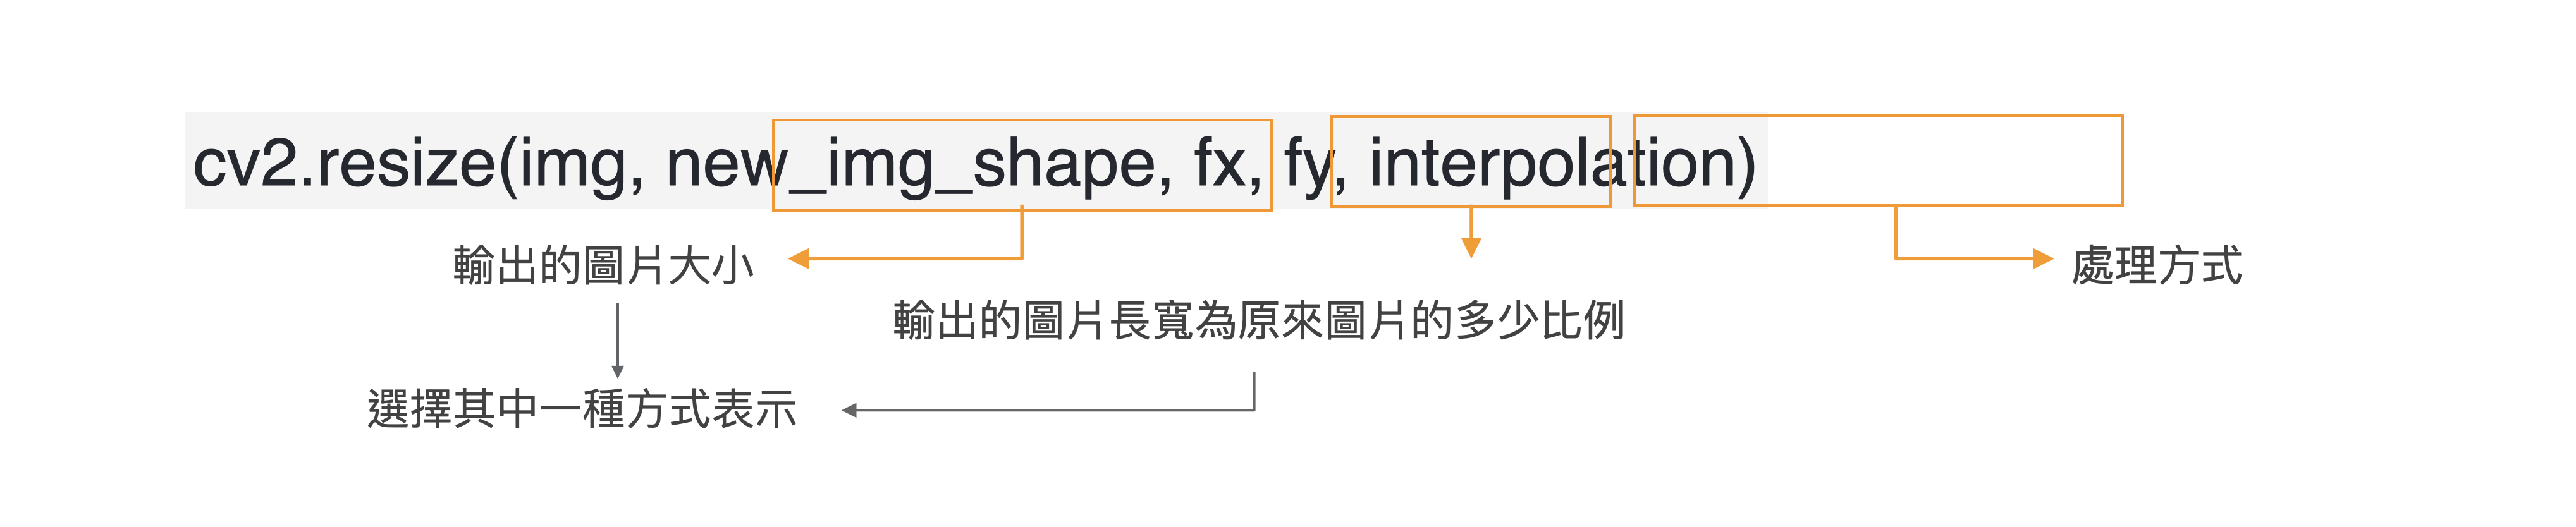

In [ ]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
orig_img = cv2.resize(img, img_area_scale.shape[:2])
img_zoom = np.vstack((orig_img, img_area_scale))

In [ ]:
cv2_imshow(img_zoom)


In [ ]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片

img_zoom = np.hstack((img_area_scale, img_cubic_scale))

In [ ]:
cv2_imshow(img_zoom)


In [ ]:
# 設定 translation transformation matrix
# x 平移 100 pixel; y 平移 50 pixel
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))

In [ ]:
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)

In [ ]:
M

In [ ]:
cv2_imshow(img_shift)


In [ ]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 50],
              [0, 1, 100]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]) )

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))

In [ ]:
cv2_imshow(img_shift)
